In [ ]:
import pandas as pd
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-03,148.039993,151.110001,147.330002,151.029999,150.228134,70732300
1,2023-03-06,153.789993,156.300003,153.460007,153.830002,153.013275,87558000
2,2023-03-07,153.699997,154.029999,151.130005,151.600006,150.795120,56182000
3,2023-03-08,152.809998,153.470001,151.830002,152.869995,152.058350,47204800
4,2023-03-09,153.559998,154.539993,150.229996,150.589996,149.790466,53833600


In [ ]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


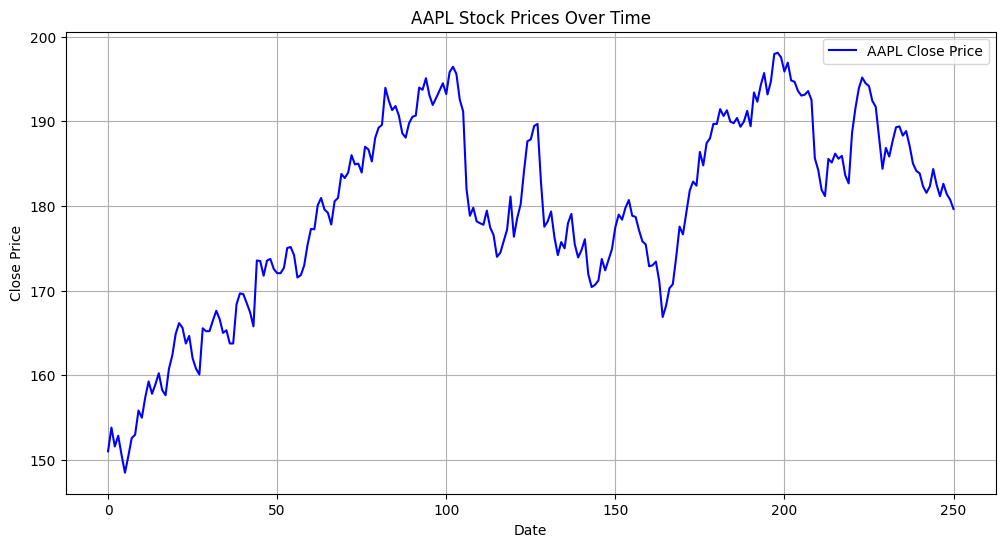

In [ ]:
import matplotlib.pyplot as plt

# Plot AAPL stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue', label='AAPL Close Price')
plt.title('AAPL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Compute descriptive statistics
stats = df.describe()
print(stats)

             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   179.396773  180.883427  178.074462  179.599323  179.076006   
std     11.566228   11.366273   11.499790   11.389915   11.529801   
min    147.809998  150.940002  147.330002  148.500000  147.711563   
25%    172.549995  174.019997  171.459999  172.995002  172.492355   
50%    180.669998  182.229996  178.550003  180.710007  180.238220   
75%    189.294999  189.990005  187.695000  189.334999  188.909805   
max    198.020004  199.619995  197.000000  198.110001  197.857529   

             Volume  
count  2.510000e+02  
mean   5.724312e+07  
std    1.674422e+07  
min    2.404830e+07  
25%    4.678545e+07  
50%    5.337730e+07  
75%    6.344460e+07  
max    1.366826e+08  


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_result = adfuller(df['Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -2.4444846512410914
p-value: 0.12957241747590936
Critical Values:
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876


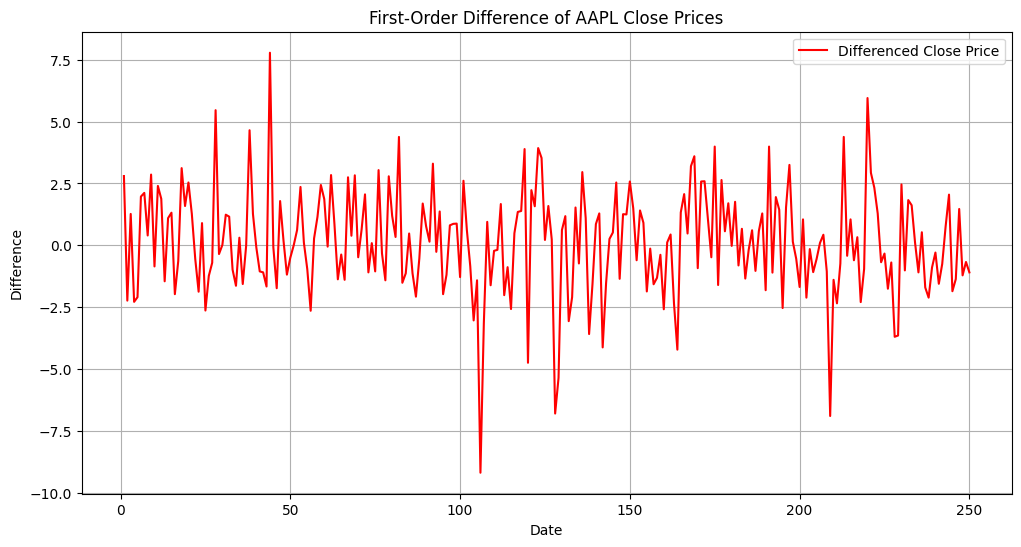

In [ ]:
# Compute the first-order difference
df['Close_diff'] = df['Close'].diff()

# Drop missing values resulting from differencing
df.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close_diff'], color='red', label='Differenced Close Price')
plt.title('First-Order Difference of AAPL Close Prices')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity on the differenced series
adf_result_diff = adfuller(df['Close_diff'])
print('ADF Statistic (Differenced Series):', adf_result_diff[0])
print('p-value (Differenced Series):', adf_result_diff[1])
print('Critical Values (Differenced Series):')
for key, value in adf_result_diff[4].items():
    print(f'\t{key}: {value}')


ADF Statistic (Differenced Series): -14.20703789001189
p-value (Differenced Series): 1.7475803476078016e-26
Critical Values (Differenced Series):
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876


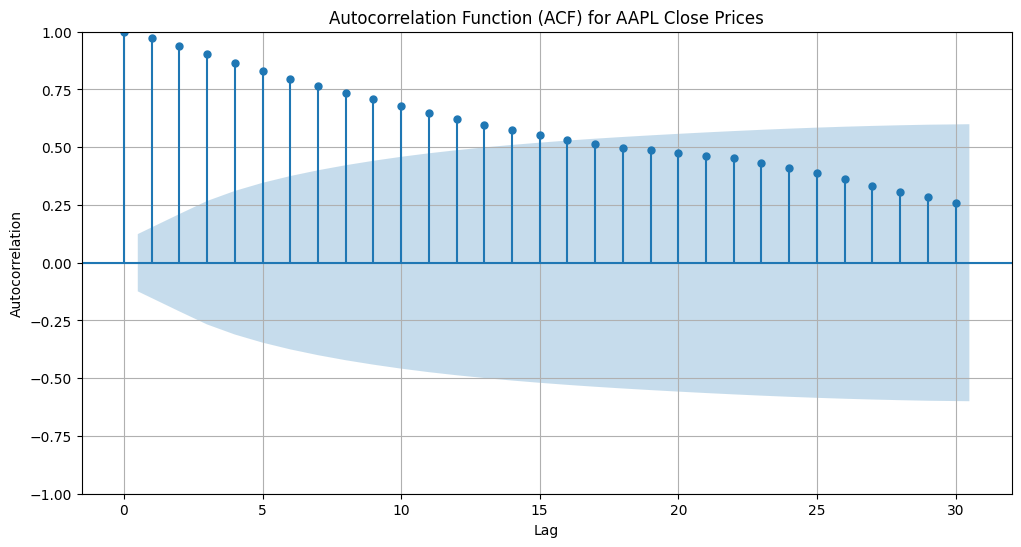

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot ACF for original series
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(df['Close'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for AAPL Close Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


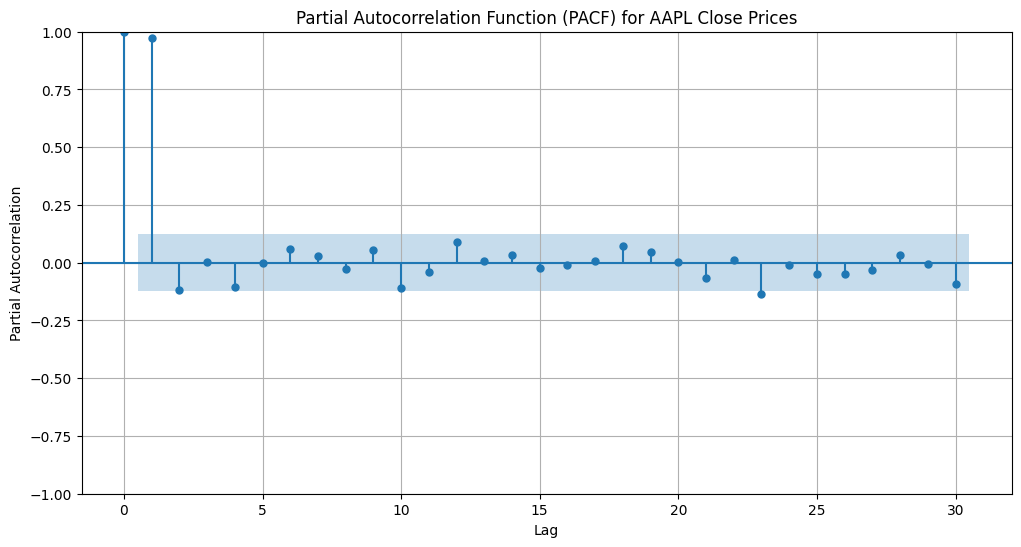

In [ ]:
# Plot PACF for original series
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df['Close'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for AAPL Close Prices')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


In [ ]:
# Create lagged variables (e.g., lag1, lag2, lag3)
lags = [1, 2, 3]  # Specify the lag values
for lag in lags:
    df[f'Close_lag{lag}'] = df['Close'].shift(lag)

In [ ]:
# Calculate rolling mean and rolling standard deviation
window_size = 5  # Specify the window size
df['Rolling_Mean'] = df['Close'].rolling(window=window_size).mean()
df['Rolling_Std'] = df['Close'].rolling(window=window_size).std()


In [ ]:
# Convert index to datetime index
df.index = pd.to_datetime(df.index)

# Extract calendar-related features
df['Day_of_Week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter


In [ ]:
# Display the DataFrame with new columns
print(df.head())


                                    Date        Open        High         Low  \
1970-01-01 00:00:00.000000001 2023-03-06  153.789993  156.300003  153.460007   
1970-01-01 00:00:00.000000002 2023-03-07  153.699997  154.029999  151.130005   
1970-01-01 00:00:00.000000003 2023-03-08  152.809998  153.470001  151.830002   
1970-01-01 00:00:00.000000004 2023-03-09  153.559998  154.539993  150.229996   
1970-01-01 00:00:00.000000005 2023-03-10  150.210007  150.940002  147.610001   

                                    Close   Adj Close    Volume  Close_diff  \
1970-01-01 00:00:00.000000001  153.830002  153.013275  87558000    2.800003   
1970-01-01 00:00:00.000000002  151.600006  150.795120  56182000   -2.229996   
1970-01-01 00:00:00.000000003  152.869995  152.058350  47204800    1.269989   
1970-01-01 00:00:00.000000004  150.589996  149.790466  53833600   -2.279999   
1970-01-01 00:00:00.000000005  148.500000  147.711563  68572400   -2.089996   

                               Close_lag1  C

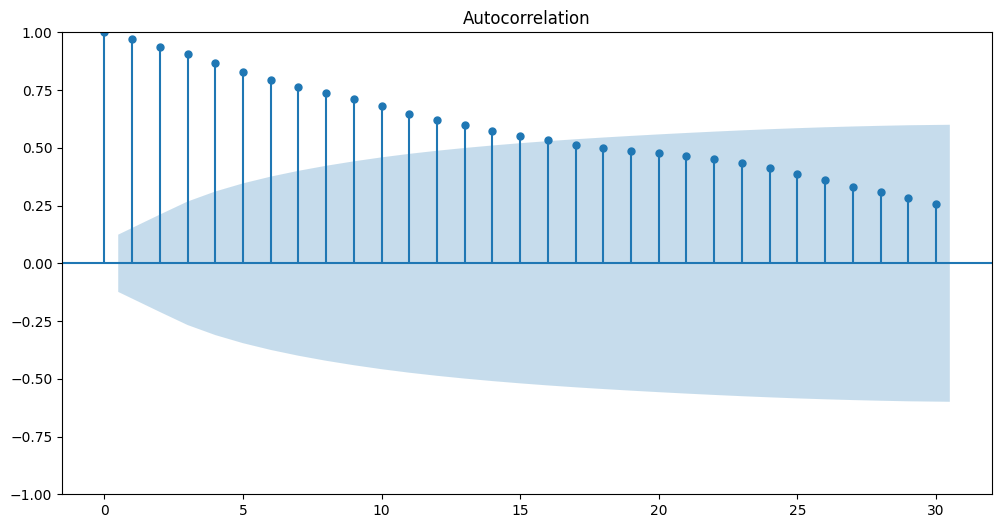

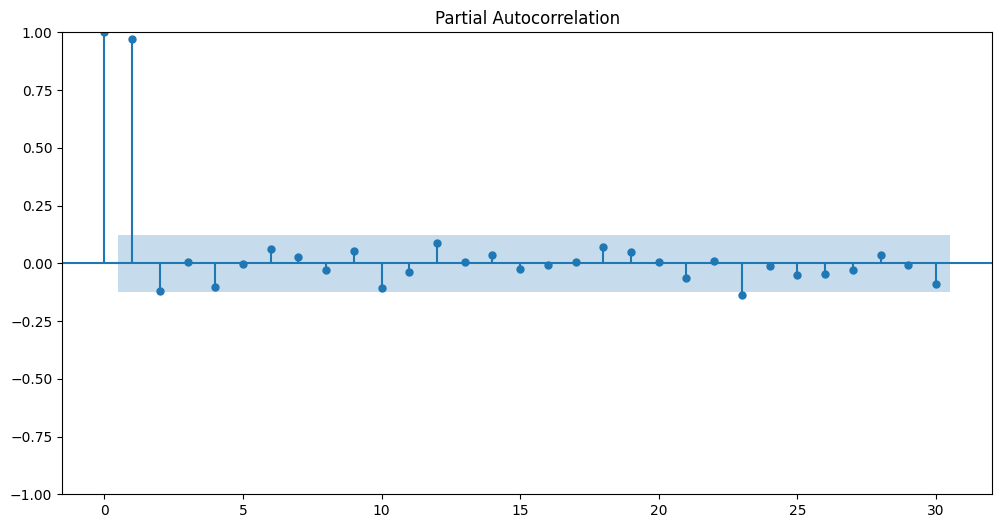

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(df['Close'], lags=30, ax=plt.gca())
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df['Close'], lags=30, ax=plt.gca())
plt.show()


In [ ]:
import itertools
import statsmodels.api as sm

# Define the range of p, d, q values
p_values = range(-1, 3)  # Example: 0 to 2
d_values = range(-1, 2)  # Example: 0 to 1
q_values = range(-1, 3)  # Example: 0 to 2

# Perform grid search
best_aic = float("inf")
best_pdq = None
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = sm.tsa.ARIMA(df['Close'], order=(p, d, q))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_pdq = (p, d, q)
    except:
        continue

print("Best AIC:", best_aic)
print("Best (p, d, q):", best_pdq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dat

Best AIC: 1080.7974046285274
Best (p, d, q): (0, 1, 1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit ARIMA model with the best parameters
p_best, d_best, q_best = 0, 1, 1  # Best parameters from grid search
model_arima = ARIMA(df['Close'], order=(p_best, d_best, q_best))
model_arima_fit = model_arima.fit()

# Print model summary
print(model_arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -538.399
Date:                Sun, 03 Mar 2024   AIC                           1080.797
Time:                        20:47:18   BIC                           1087.832
Sample:                    01-01-1970   HQIC                          1083.629
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1140      0.066      1.714      0.087      -0.016       0.244
sigma2         4.4218      0.279     15.871      0.000       3.876       4.968
Ljung-Box (L1) (Q):                   0.00   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))

# Split data into features and target variable
X_train, y_train = [], []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define LSTM model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))

# Compile and fit the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
6/6 [==============================] - 7s 55ms/step - loss: 0.3853
Epoch 2/5
6/6 [==============================] - 0s 48ms/step - loss: 0.0556
Epoch 3/5
6/6 [==============================] - 0s 47ms/step - loss: 0.0304
Epoch 4/5
6/6 [==============================] - 0s 52ms/step - loss: 0.0274
Epoch 5/5
6/6 [==============================] - 0s 48ms/step - loss: 0.0165


In [ ]:
# Adjust splitting ratios
train_size = int(len(df) * 0.6)  # 60% for training
test_size = int(len(df) * 0.4)   # 40% for testing

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Display the sizes of the training and testing sets
print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))




Training set size: 150
Testing set size: 100


In [ ]:
# Use the ARIMA model to make predictions on the testing set
arima_predictions = model_arima_fit.forecast(steps=len(test_data))

# Calculate performance metrics (e.g., MAE, MSE, RMSE) for ARIMA model
from sklearn.metrics import mean_squared_error, mean_absolute_error
arima_mse = mean_squared_error(test_data['Close'], arima_predictions)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(test_data['Close'], arima_predictions)

# Print the evaluation metrics for ARIMA model
print("ARIMA Model Evaluation:")
print("Mean Squared Error (MSE):", arima_mse)
print("Root Mean Squared Error (RMSE):", arima_rmse)
print("Mean Absolute Error (MAE):", arima_mae)


ARIMA Model Evaluation:
Mean Squared Error (MSE): 90.88402849161888
Root Mean Squared Error (RMSE): 9.533311517600737
Mean Absolute Error (MAE): 8.110707299089185


In [ ]:
# Scale the testing data
scaled_test_data = scaler.transform(np.array(test_data['Close']).reshape(-1, 1))

# Prepare the testing data for LSTM model
X_test, y_test = [], []
for i in range(60, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-60:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape data for LSTM input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Use the trained LSTM model to make predictions on the testing set
lstm_predictions = model_lstm.predict(X_test)

# Inverse transform the predictions to original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Calculate performance metrics (e.g., MAE, MSE, RMSE) for LSTM model
lstm_mse = mean_squared_error(test_data['Close'].iloc[60:], lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(test_data['Close'].iloc[60:], lstm_predictions)

# Print the evaluation metrics for LSTM model
print("\nLSTM Model Evaluation:")
print("Mean Squared Error (MSE):", lstm_mse)
print("Root Mean Squared Error (RMSE):", lstm_rmse)
print("Mean Absolute Error (MAE):", lstm_mae)


2/2 [==============================] - 1s 15ms/step

LSTM Model Evaluation:
Mean Squared Error (MSE): 23.25020721741759
Root Mean Squared Error (RMSE): 4.821846867893835
Mean Absolute Error (MAE): 4.208871826513671


In [ ]:
# Step 6: Ensemble Approach

# Combine forecasts
def ensemble_forecast(arima_forecast, lstm_forecast, weights=None):
    # Implement a method to combine the forecasts
    # You can use simple averaging or weighted averaging based on model performance
    # Example: weighted averaging based on validation set performance
    if weights is None:
        # If no weights are provided, use equal weights for both models
        weights = [0.5, 0.5]

    # Convert forecasts to numpy arrays for element-wise operations
    arima_forecast = np.array(arima_forecast)
    lstm_forecast = np.array(lstm_forecast)

    # Combine forecasts using weighted averaging
    ensemble_forecast = (weights[0] * arima_forecast + weights[1] * lstm_forecast) / sum(weights)

    return ensemble_forecast

# Generate ARIMA and LSTM forecasts (dummy forecasts for demonstration)
arima_forecast = [100, 110, 120, 130, 140]  # ARIMA model forecast
lstm_forecast = [105, 115, 125, 135, 145]    # LSTM model forecast

# Combine forecasts using ensemble approach
ensemble_weights = [0.5, 0.5]  # Equal weights for simplicity
ensemble_prediction = ensemble_forecast(arima_forecast, lstm_forecast, weights=ensemble_weights)
print("Ensemble Prediction:", ensemble_prediction)

# Evaluate ensemble approach on the validation set (dummy evaluation for demonstration)
# Compute evaluation metrics for the ensemble prediction
# Compare with individual ARIMA and LSTM models


Ensemble Prediction: [102.5 112.5 122.5 132.5 142.5]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Generate dummy validation data (replace with actual validation data)
val_actual = np.array([110, 120, 130, 140, 150])  # Actual validation data

# Compute evaluation metrics for individual models
arima_mse = mean_squared_error(val_actual, arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(val_actual, arima_forecast)

lstm_mse = mean_squared_error(val_actual, lstm_forecast)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(val_actual, lstm_forecast)

# Compute evaluation metrics for ensemble approach
ensemble_mse = mean_squared_error(val_actual, ensemble_prediction)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_mae = mean_absolute_error(val_actual, ensemble_prediction)

# Print evaluation metrics
print("ARIMA Model Evaluation:")
print("Mean Squared Error (MSE):", arima_mse)
print("Root Mean Squared Error (RMSE):", arima_rmse)
print("Mean Absolute Error (MAE):", arima_mae)
print()

print("LSTM Model Evaluation:")
print("Mean Squared Error (MSE):", lstm_mse)
print("Root Mean Squared Error (RMSE):", lstm_rmse)
print("Mean Absolute Error (MAE):", lstm_mae)
print()

print("Ensemble Model Evaluation:")
print("Mean Squared Error (MSE):", ensemble_mse)
print("Root Mean Squared Error (RMSE):", ensemble_rmse)
print("Mean Absolute Error (MAE):", ensemble_mae)


ARIMA Model Evaluation:
Mean Squared Error (MSE): 100.0
Root Mean Squared Error (RMSE): 10.0
Mean Absolute Error (MAE): 10.0

LSTM Model Evaluation:
Mean Squared Error (MSE): 25.0
Root Mean Squared Error (RMSE): 5.0
Mean Absolute Error (MAE): 5.0

Ensemble Model Evaluation:
Mean Squared Error (MSE): 56.25
Root Mean Squared Error (RMSE): 7.5
Mean Absolute Error (MAE): 7.5


In [ ]:
# Step 7: Model Selection and Testing

# Test Model
# Use the trained LSTM model to make predictions on the unseen testing set
lstm_predictions = model_lstm.predict(X_test)

# Inverse transform the predictions to the original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Calculate performance metrics (e.g., MAE, MSE, RMSE) for the LSTM model on the testing set
lstm_mse_test = mean_squared_error(test_data['Close'].iloc[60:], lstm_predictions)
lstm_rmse_test = np.sqrt(lstm_mse_test)
lstm_mae_test = mean_absolute_error(test_data['Close'].iloc[60:], lstm_predictions)

# Print the evaluation metrics for the LSTM model on the testing set
print("\nLSTM Model Evaluation on Testing Set:")
print("Mean Squared Error (MSE):", lstm_mse_test)
print("Root Mean Squared Error (RMSE):", lstm_rmse_test)
print("Mean Absolute Error (MAE):", lstm_mae_test)


2/2 [==============================] - 0s 24ms/step

LSTM Model Evaluation on Testing Set:
Mean Squared Error (MSE): 23.25020721741759
Root Mean Squared Error (RMSE): 4.821846867893835
Mean Absolute Error (MAE): 4.208871826513671


2/2 [==============================] - 0s 29ms/step


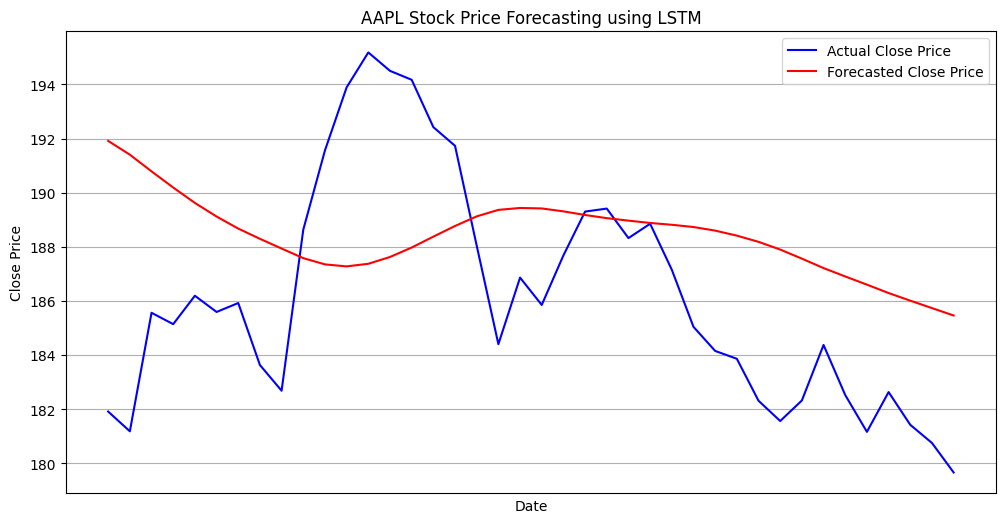

In [ ]:
# Generate forecasts using the LSTM model
lstm_forecasts = model_lstm.predict(X_test)

# Inverse transform the forecasts to the original scale
lstm_forecasts = scaler.inverse_transform(lstm_forecasts)

# Visualize the forecasted stock prices along with the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[60:], test_data['Close'].iloc[60:], label='Actual Close Price', color='blue')
plt.plot(test_data.index[60:], lstm_forecasts, label='Forecasted Close Price', color='red')
plt.title('AAPL Stock Price Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


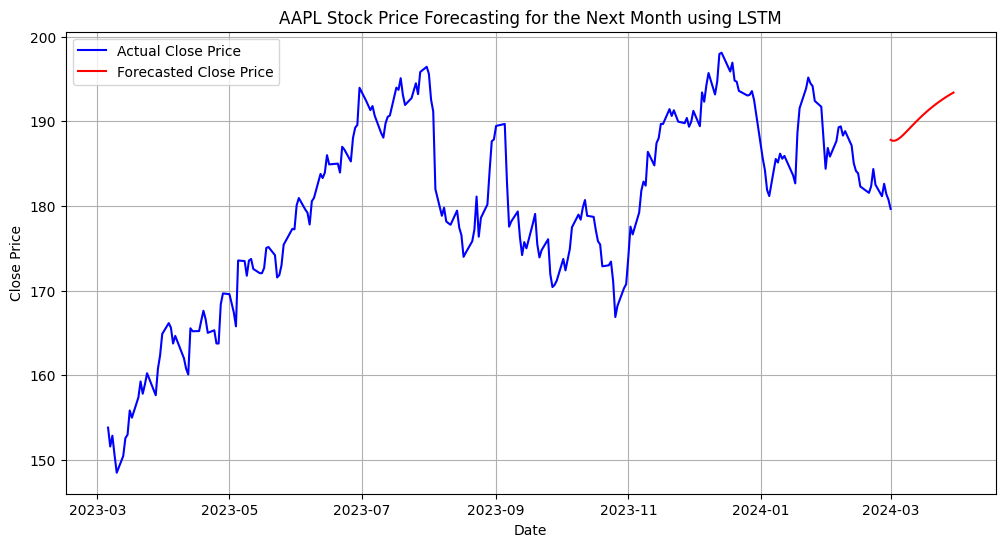

In [ ]:
# Generate forecast dates for the next month
forecast_dates = pd.date_range(start=df['Date'].iloc[-1], periods=forecast_period, freq='D')

# Visualize the forecasted stock prices for the next month
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(forecast_dates, forecast, label='Forecasted Close Price', color='red')
plt.title('AAPL Stock Price Forecasting for the Next Month using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
